**GRIP:** The Sparks Foundation-Data Science and Business Analytics Internship

**Task 2: Prediction using Unsupervised Machine Learning**



**Objective of the problem:** Predicting optimum number of clusters using unsupervised ML and represent it visually.


**Author: Sonali Garg**



**Method for unsupervised ML used:** K-Means Clustering

Unsupervised machine learning is a type of machine learning in which a model is trained to find patterns or relationships in the input data without explicit guidance on what to look for. Unlike supervised learning, there is no target variable or labeled data to guide the model, so the algorithm must identify patterns and structures in the data on its own.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
#loading the iris dataset using pandas
df= pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**What is K-means clustering?** 
It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

In [6]:
#finding the optimum number of clusters for K-means classification
x=df.iloc[:,[0,1,2,3]].values # this returns the values in the resulting subset as a NumPy array
from sklearn.cluster import KMeans #importing kmeans clustering algorithm
wcss=[] #within cluster sum of squares; used to evaluate the quality of the clustering solution
for i in range(1,11): #integers used to test different numbers of clusters for the KMeans algorithm
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) #creates a new KMeans object with the specified parameters
    kmeans.fit(x) #fits the KMeans model to the data 'x' using the specified parameters
    wcss.append(kmeans.inertia_) #adds the WCSS value for the current clustering solution

**Elbow Method:** It is a way to visualize and choose the appropriate number of clusters for K-means clustering.
A plot of the WCSS against the number of clusters, results into a point at which the rate of decrease in WCSS begins to level off. This point looks like an elbow, hence the name "elbow method."

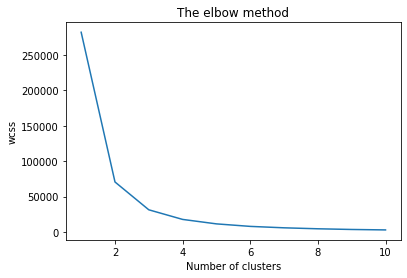

In [8]:
#plotting the results onto a line graph
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()

From the above elbow method graph we can see that the optimum clusters is where the elbow occurs. This is when the wcss doesn't decrease significantly with every iteration.
Choosing the number of clusters as 3, i.e., K=3

In [9]:
#applying kmeans to the dataset and creating the kmeans classifier
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x) #fitting the kmeans model to the data and then predicting the cluster labels for the data

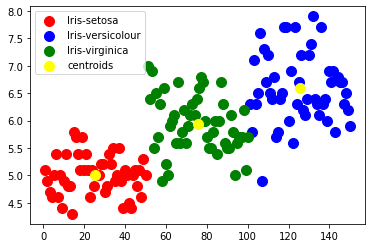

In [10]:
#visualizing the clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')
#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()

**THANK YOU!**